In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.13.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/folhas_atv04/folhaszip_final.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

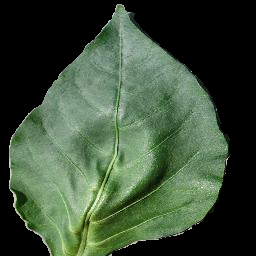

In [7]:
tf.keras.preprocessing.image.load_img('/content/folhaszip_final/training_set/folha_pimenta/pimenta_0.png')

In [8]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [10]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/folhaszip_final/training_set',
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 480 images belonging to 4 classes.


In [11]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [12]:
dataset_treinamento.class_indices

{'folha_blueberry': 0, 'folha_morango': 1, 'folha_pimenta': 2, 'folha_uva': 3}

In [14]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/folhaszip_final/test_set',
                                                  target_size = (64, 64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 240 images belonging to 4 classes.


In [15]:
rede_neural = Sequential()
rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 578, activation='relu'))
rede_neural.add(Dense(units = 578, activation='relu'))
rede_neural.add(Dense(units = 4, activation='softmax'))

rede_neural.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [16]:
rede_neural.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
historico = rede_neural.fit(dataset_treinamento, epochs=50)

Epoch 1/50
60/60 [==============================] - 8s 89ms/step - loss: 1.1902 - accuracy: 0.4250
Epoch 2/50
60/60 [==============================] - 4s 71ms/step - loss: 1.0481 - accuracy: 0.4833
Epoch 3/50
60/60 [==============================] - 5s 86ms/step - loss: 0.9722 - accuracy: 0.5646
Epoch 4/50
60/60 [==============================] - 4s 72ms/step - loss: 0.8202 - accuracy: 0.6938
Epoch 5/50
60/60 [==============================] - 6s 100ms/step - loss: 0.6669 - accuracy: 0.7333
Epoch 6/50
60/60 [==============================] - 4s 70ms/step - loss: 0.5870 - accuracy: 0.7625
Epoch 7/50
60/60 [==============================] - 6s 102ms/step - loss: 0.5383 - accuracy: 0.7896
Epoch 8/50
60/60 [==============================] - 4s 69ms/step - loss: 0.5139 - accuracy: 0.8188
Epoch 9/50
60/60 [==============================] - 6s 94ms/step - loss: 0.5127 - accuracy: 0.8000
Epoch 10/50
60/60 [==============================] - 4s 68ms/step - loss: 0.3972 - accuracy: 0.8417
Epoch 1

In [18]:
previsoes = rede_neural.predict(dataset_teste)
previsoes

240/240 [==============================] - 2s 7ms/step


array([[9.99996066e-01, 1.21025564e-12, 3.96134556e-06, 9.39598825e-17],
       [9.93067384e-01, 1.33271741e-10, 6.93257200e-03, 9.56994813e-12],
       [9.99203980e-01, 7.95969157e-04, 1.73478341e-07, 4.59176963e-09],
       [9.99999881e-01, 2.07009698e-09, 6.65965842e-08, 4.60118693e-10],
       [9.99998927e-01, 2.38213294e-09, 1.11817485e-06, 1.00317321e-09],
       [8.55250895e-01, 1.40696526e-01, 4.48494627e-12, 4.05255426e-03],
       [1.95941902e-06, 3.26921036e-05, 3.22828273e-05, 9.99933004e-01],
       [6.79319492e-05, 3.25649410e-08, 9.99932051e-01, 5.33480815e-10],
       [7.75968194e-01, 5.26190177e-03, 2.18761921e-01, 7.93468280e-06],
       [9.99655843e-01, 1.16225476e-06, 3.39302875e-04, 3.71536157e-06],
       [9.99999166e-01, 1.40812728e-09, 8.54637506e-07, 1.08738097e-11],
       [9.99289632e-01, 1.25439010e-05, 6.95117167e-04, 2.75295270e-06],
       [9.28993404e-01, 4.94855605e-02, 2.14890335e-02, 3.19864776e-05],
       [9.99999642e-01, 9.31916544e-10, 3.85129539e

In [19]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [20]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.925

In [22]:
dataset_teste.class_indices

{'folha_blueberry': 0, 'folha_morango': 1, 'folha_pimenta': 2, 'folha_uva': 3}

<Axes: >

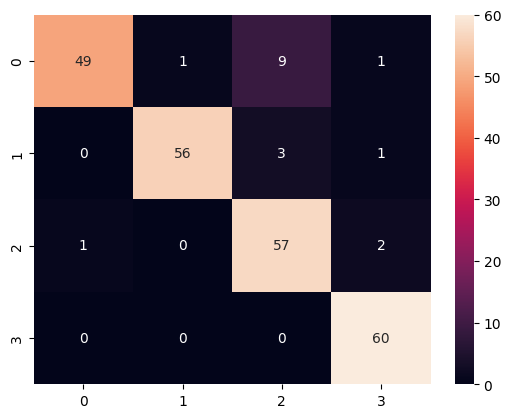

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True)